CNN for data regression

'/content'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
os.chdir('../../DATA')
print(os.getcwd())
from read_data import read_data

FileNotFoundError: ignored

In [ ]:
print(os.getcwd())

c:\Users\romain.dodet\Desktop\Code\DATA


In [ ]:
time, inputs, outputs = read_data('SIMPLE/MATLAB/outputs/inductance_saturante/batch_0001.mat', 1, 1)
X = inputs
Y = outputs

In [ ]:
# Normalization
X = X / np.max(X)
Y = Y / np.max(Y)

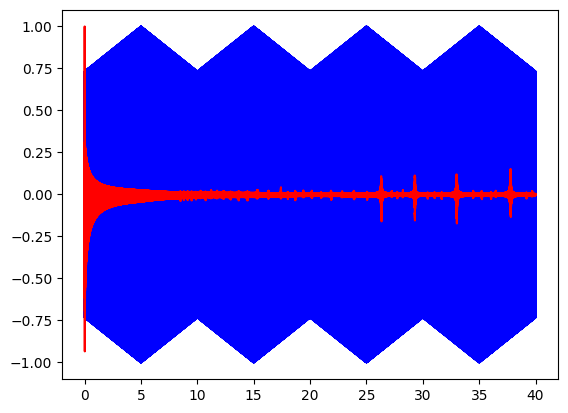

In [ ]:
# Plot the data
plt.plot(time, X, color="blue")
plt.plot(time, Y, color="red")
plt.show()

In [ ]:
print("X", X.shape)
print("Y", Y.shape)

# Reshape the data from (n, 1) to (1, n)
X = X.reshape(1, X.shape[0])
Y = Y.reshape(1, Y.shape[0])

X (4000001, 1)
Y (4000001, 1)


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


In [ ]:
def build_model(input_shape, output_shape):
    """
    Build a CNN to predict a time series from another one

    Input: numpy array, dimension(n_features, n_samples)
    Output: numpy array, dimension(n_features, n_samples)
    """
    model = Sequential()
    model.add(Dense(64, input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(output_shape))
    model.add(Activation('linear'))
    return model

model = build_model((1000,), 1000)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
# Create X_train, Y_train from X, Y
X_train = []
Y_train = []
for i in range(0, X.shape[1] - 1000, 100):
    X_train.append(X[0, i:i+1000])
    Y_train.append(Y[0, i:i+1000])

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(39991, 1000)
(39991, 1000)


In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 12s 8ms/step - loss: 6.5233e-04 - accuracy: 0.0011
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 3.3540e-04 - accuracy: 9.2521e-04
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.9446e-04 - accuracy: 0.0011
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.7679e-04 - accuracy: 0.0012
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.6281e-04 - accuracy: 0.0014
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5472e-04 - accuracy: 0.0014
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 2.3742e-04 - accuracy: 0.0014
Epoch 8/10
1250/1250 [==============================] - 10s 8ms/step - loss: 2.2776e-04 - accuracy: 0.0015
Epoch 9/10
1250/1250 [==============================] - 9s 8ms/step - loss: 2.1814e-04 - accuracy: 0.0013
Epoch 10/10
1250/1250 [=================

In [ ]:
# Testing with RNN
from tensorflow.keras.layers import SimpleRNN

def build_model_RNN(input_shape, output_shape):
    """
    Build a RNN to predict a time series from another one

    Input: numpy array, dimension(n_features, n_samples)
    Output: numpy array, dimension(n_features, n_samples)
    """
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=input_shape))
    model.add(Dense(output_shape))
    model.add(Activation('linear'))
    return model

In [ ]:
model = build_model_RNN((1000, 1), 1000)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense_20 (Dense)            (None, 1000)              65000     
                                                                 
 activation_17 (Activation)  (None, 1000)              0         
                                                                 
Total params: 69,224
Trainable params: 69,224
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
  77/1250 [>.............................] - ETA: 37:51 - loss: 7.8033e-04 - accuracy: 8.1169e-04

In [ ]:
# Testing with LSTM
from tensorflow.keras.layers import LSTM

def build_model_LSTM(input_shape, output_shape):
    """
    Build a LSTM to predict a time series from another one

    Input: numpy array, dimension(n_features, n_samples)
    Output: numpy array, dimension(n_features, n_samples)
    """
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(output_shape))
    model.add(Activation('linear'))
    return model

In [ ]:
model = build_model_LSTM((1000, 1), 1000)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

In [ ]:
# Testing with GRU
from tensorflow.keras.layers import GRU

def build_model_GRU(input_shape, output_shape):
    """
    Build a GRU to predict a time series from another one

    Input: numpy array, dimension(n_features, n_samples)
    Output: numpy array, dimension(n_features, n_samples)
    """
    model = Sequential()
    model.add(GRU(64, input_shape=input_shape))
    model.add(Dense(output_shape))
    model.add(Activation('linear'))
    return model

In [ ]:
model = build_model_GRU((1000, 1), 1000)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)